In [1]:
# importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# importing data

data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.columns = [['customer_id', 'genre', 'age', 'annual_income',
       'spending']]

In [4]:
# Glimse of datatypes

data.dtypes

customer_id       int64
genre            object
age               int64
annual_income     int64
spending          int64
dtype: object

In [5]:
# Glimse of actual data
data.head()

,customer_id,genre,age,annual_income,spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
(customer_id,)      200 non-null int64
(genre,)            200 non-null object
(age,)              200 non-null int64
(annual_income,)    200 non-null int64
(spending,)         200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Identifying null values in the data-set

data.isnull().any()

customer_id      False
genre            False
age              False
annual_income    False
spending         False
dtype: bool

C:\Users\gaura\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


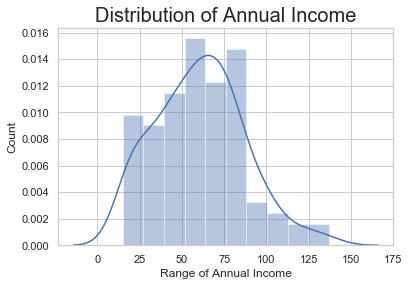

In [8]:
# Visualizing annual income

sns.set(style = 'whitegrid')
sns.distplot(data['annual_income'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')
plt.show()

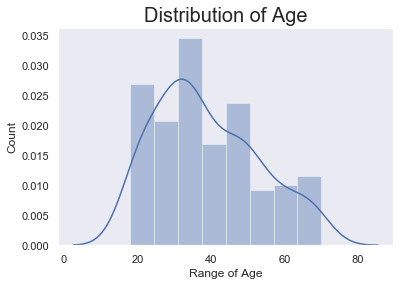

In [9]:
# Visualizing the distribution of age in data set

sns.set(style = 'dark')
sns.distplot(data['age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

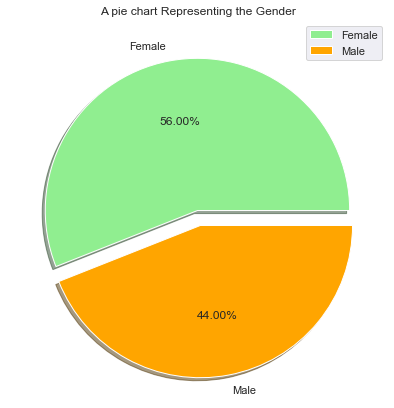

In [10]:
# Visualizing the genre distribution

labels = ['Female', 'Male']
size = [112, 88]
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('A pie chart Representing the Gender')
plt.axis('off')
plt.legend()
plt.show()

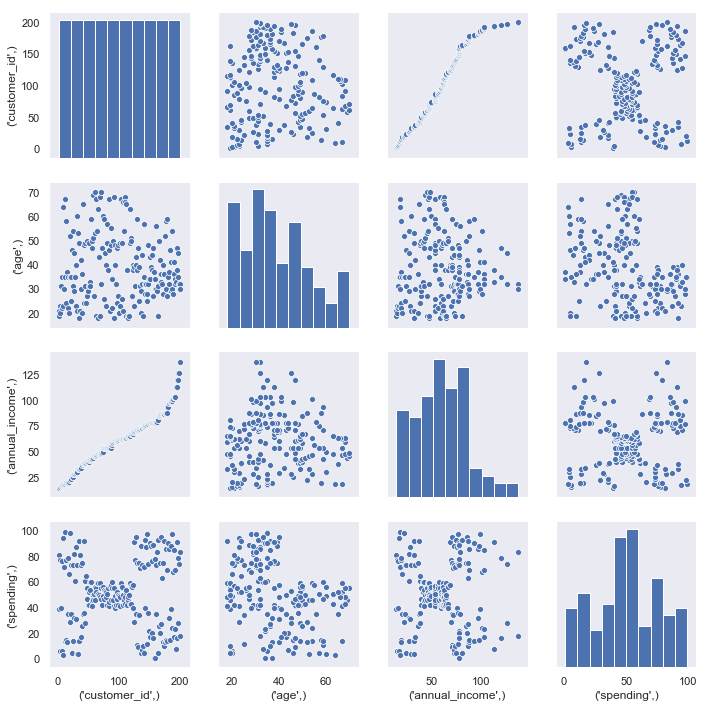

In [11]:
# pair plot between all the features in data set

sns.pairplot(data)

In [12]:
# Preparing data for further clustering

data = data.drop('customer_id', axis=1)
encode = LabelEncoder()
encoded_genre = encode.fit_transform(data['genre'])

print(encoded_genre)

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


C:\Users\gaura\Anaconda3\lib\site-packages\pandas\core\generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)
C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# Appending the encoded genre

data['genre'] = encoded_genre
data.head()

,genre,age,annual_income,spending
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [14]:
# Dimensionality reduction

pca_reducer = PCA(n_components=2)
reduced_data = pca_reducer.fit_transform(data)

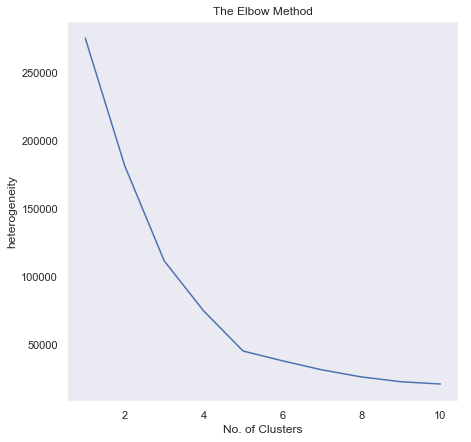

In [15]:
# optimizing the number of clusters using kmeans

from sklearn.cluster import KMeans

heterogeneity = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(reduced_data)
  heterogeneity.append(km.inertia_)
  
plt.plot(range(1, 11), heterogeneity)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('heterogeneity')
plt.show()

In [16]:
# Modelling using best predicted K

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(reduced_data)

In [17]:
# Appending predicted cluster to original data

data['cluster']= y_means

In [18]:
data[1:50]

,genre,age,annual_income,spending,cluster
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3
5,0,22,17,76,4
6,0,35,18,6,3
7,0,23,18,94,4
8,1,64,19,3,3
9,0,30,19,72,4
10,1,67,19,14,3


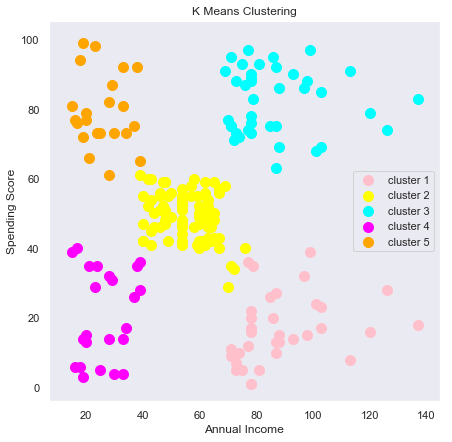

In [19]:
# Visualizing the income and spending of each clusters


plt.scatter(data.iloc[y_means == 0, 2], data.iloc[y_means == 0, 3], s = 100, c = 'pink', label = 'cluster 1')
plt.scatter(data.iloc[y_means == 1, 2], data.iloc[y_means == 1, 3], s = 100, c = 'yellow', label = 'cluster 2')
plt.scatter(data.iloc[y_means == 2, 2], data.iloc[y_means == 2, 3], s = 100, c = 'cyan', label = 'cluster 3')
plt.scatter(data.iloc[y_means == 3, 2], data.iloc[y_means == 3, 3], s = 100, c = 'magenta', label = 'cluster 4')
plt.scatter(data.iloc[y_means == 4, 2], data.iloc[y_means == 4, 3], s = 100, c = 'orange', label = 'cluster 5')
#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

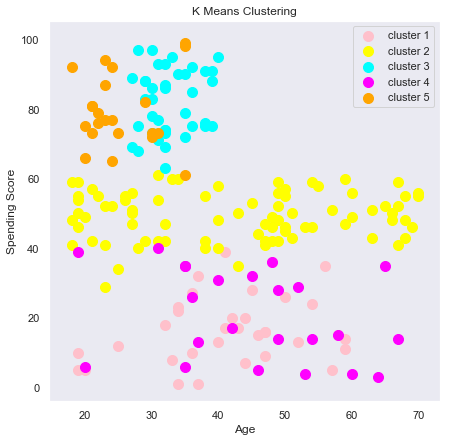

In [20]:
# Visualizing the age and spending of each clusters


plt.scatter(data.iloc[y_means == 0, 1], data.iloc[y_means == 0, 3], s = 100, c = 'pink', label = 'cluster 1')
plt.scatter(data.iloc[y_means == 1, 1], data.iloc[y_means == 1, 3], s = 100, c = 'yellow', label = 'cluster 2')
plt.scatter(data.iloc[y_means == 2, 1], data.iloc[y_means == 2, 3], s = 100, c = 'cyan', label = 'cluster 3')
plt.scatter(data.iloc[y_means == 3, 1], data.iloc[y_means == 3, 3], s = 100, c = 'magenta', label = 'cluster 4')
plt.scatter(data.iloc[y_means == 4, 1], data.iloc[y_means == 4, 3], s = 100, c = 'orange', label = 'cluster 5')
# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

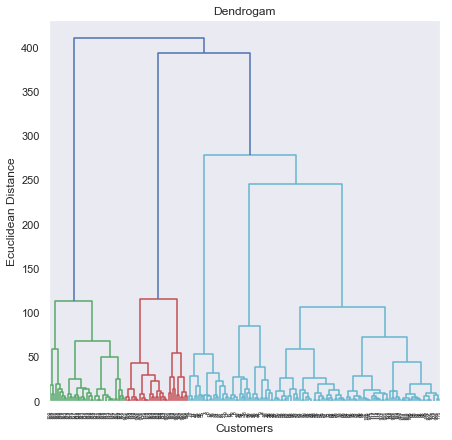

In [21]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(reduced_data, method = 'ward'))
plt.title('Dendrogam')
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

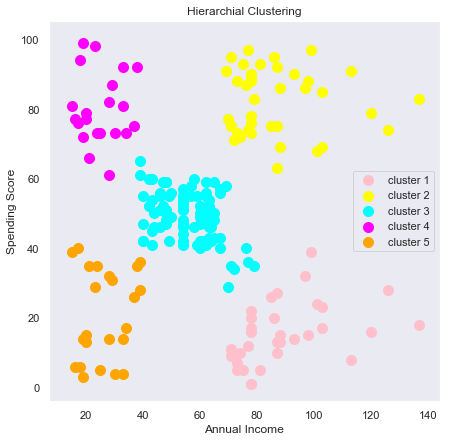

In [22]:


from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(reduced_data)

plt.scatter(data.iloc[y_hc == 0, 2], data.iloc[y_hc == 0, 3], s = 100, c = 'pink', label = 'cluster 1')
plt.scatter(data.iloc[y_hc == 1, 2], data.iloc[y_hc == 1, 3], s = 100, c = 'yellow', label = 'cluster 2')
plt.scatter(data.iloc[y_hc == 2, 2], data.iloc[y_hc == 2, 3], s = 100, c = 'cyan', label = 'cluster 3')
plt.scatter(data.iloc[y_hc == 3, 2], data.iloc[y_hc == 3, 3], s = 100, c = 'magenta', label = 'cluster 4')
plt.scatter(data.iloc[y_hc == 4, 2], data.iloc[y_hc == 4, 3], s = 100, c = 'orange', label = 'cluster 5')

plt.title('Hierarchial Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()